In [1]:
import pytest
import numpy as np

import utils as tu
import gefera as gf
import matplotlib.pyplot as plt

In [2]:
tu.random_args_conf()

{'a1': 32.507374014676074,
 't1': -3.4585238594780314,
 'e1': 0.09123360340719289,
 'p1': 63.666383248346946,
 'w1': 1.624001876976823,
 'i1': 0.859076079220923,
 'a2': 377.1166473168159,
 't2': 6.145597163613143,
 'e2': 0.03466452086904482,
 'p2': 9.144016475234448,
 'o2': 1.540997284243717,
 'w2': 1.3051228980528304,
 'i2': 0.9231438352467835}

In [16]:
d = np.array(tu.random_args_conf(dictionary=False))
t = np.linspace(0, np.max([d[3], d[9]]), 10)
dx = 1e-8

o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
sys = gf.ConfocalSystem(o1, o2)

bp, bpm, theta, dbp, dbpm, dtheta = sys.impacts(t, grad=True)
dbp_fd = np.zeros_like(dbp)
dbpm_fd = np.zeros_like(dbpm)
dtheta_fd = np.zeros_like(dtheta)

print('[', end='')
for di in d[:-1]:
    print('{0},'.format(di), end=' ')
print(d[-1], end='')
print(']')

for i in range(len(d)):
    d[i] += dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
    sys_plus = gf.ConfocalSystem(o1, o2)
    
    d[i] -= 2 * dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.ConfocalOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12])
    sys_minus = gf.ConfocalSystem(o1, o2)
    
    bp_plus, bpm_plus, theta_plus = sys_plus.impacts(t)
    bp_minus, bpm_minus, theta_minus = sys_minus.impacts(t)
    
    dbp_fd[i, :] = (bp_plus - bp_minus) / (2 * dx)
    dbpm_fd[i, :] = (bpm_plus - bpm_minus) / (2 * dx)
    dtheta_fd[i, :] = (theta_plus - theta_minus) / (2 * dx)
    
    assert np.all(np.isclose(dbp[i], dbp_fd[i], atol=1e-4))
    assert np.all(np.isclose(dbpm[i], dbpm_fd[i], atol=1e-4))
    assert np.all(np.isclose(dtheta[i], dtheta_fd[i], atol=1e-4))

[126.49577568012296, -1.6887551108507317, 0.7887703304444428, 27.324435848357574, 2.300698662352017, 0.6358422399132542, 373.1833389804012, -2.722821719341704, 0.5009328156813628, 1.5256607723395088, 0.7942670794023093, 3.903946851711146, 0.5755550294555625]


In [ ]:
for i in range(len(d)):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(t, dbp[i])
    axs[0].plot(t, dbp_fd[i])
    axs[1].plot(t, dbpm[i])
    axs[1].plot(t, dbpm_fd[i])
    axs[2].plot(t, dtheta[i])
    axs[2].plot(t, dtheta_fd[i])

In [27]:
d = np.array(tu.random_args_hrch(dictionary=False))
t = np.linspace(0, np.max([d[3], d[9]]), 10)
dx = 1e-8

print('[', end='')
for di in d[:-1]:
    print('{0},'.format(di), end=' ')
print(d[-1], end='')
print(']')

o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
o2 = gf.SatelliteOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12], d[13])
sys = gf.HierarchicalSystem(o1, o2)

bp, bpm, theta, dbp, dbpm, dtheta = sys.impacts(t, grad=True)
dbp_fd = np.zeros_like(dbp)
dbpm_fd = np.zeros_like(dbpm)
dtheta_fd = np.zeros_like(dtheta)

for i in range(len(d)):
    d[i] += dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.SatelliteOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12], d[13])
    sys_plus = gf.HierarchicalSystem(o1, o2)
    
    d[i] -= 2 * dx
    o1 = gf.PrimaryOrbit(d[0], d[1], d[2], d[3], d[4], d[5])
    o2 = gf.SatelliteOrbit(d[6], d[7], d[8], d[9], d[10], d[11], d[12], d[13])
    sys_minus = gf.HierarchicalSystem(o1, o2)
    
    bp_plus, bpm_plus, theta_plus = sys_plus.impacts(t)
    bp_minus, bpm_minus, theta_minus = sys_minus.impacts(t)
    
    dbp_fd[i, :] = (bp_plus - bp_minus) / (2 * dx)
    dbpm_fd[i, :] = (bpm_plus - bpm_minus) / (2 * dx)
    dtheta_fd[i, :] = (theta_plus - theta_minus) / (2 * dx)
    
    assert np.all(np.isclose(dbp[i], dbp_fd[i], atol=1e-4))
    assert np.all(np.isclose(dbpm[i], dbpm_fd[i], atol=1e-4))
    assert np.all(np.isclose(dtheta[i], dtheta_fd[i], atol=1e-4))

[42.97037482843434, -3.570552097422272, 0.26299679980815677, 25.614888087169746, 0.6766356646206445, 0.4396619723203977, 5.5822612129743625, -0.19661182243682518, 0.9905306264801919, 8.239183971371848, 5.304137747469186, 1.8214306644469704, 0.4019925429852727, 0.7749014230664877]


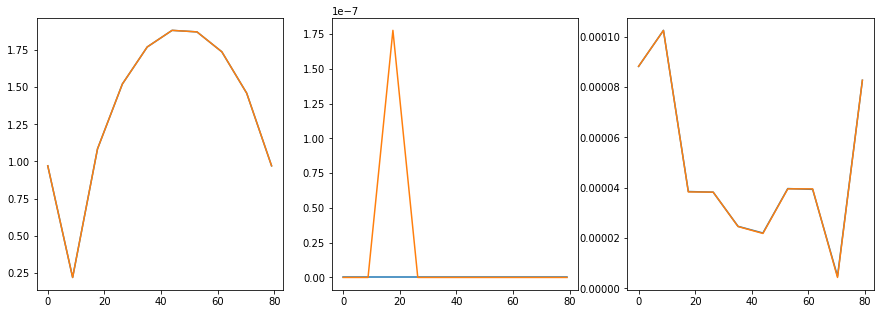

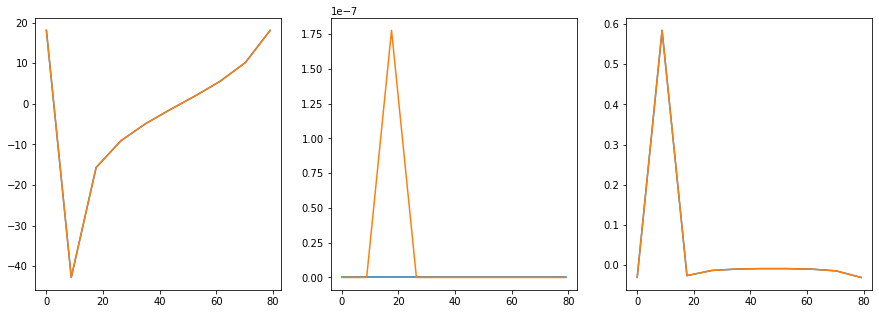

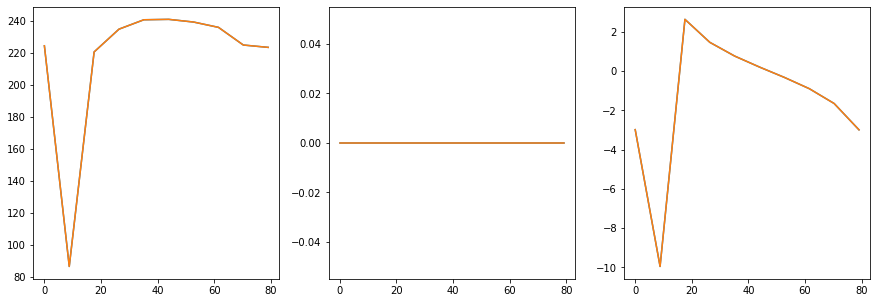

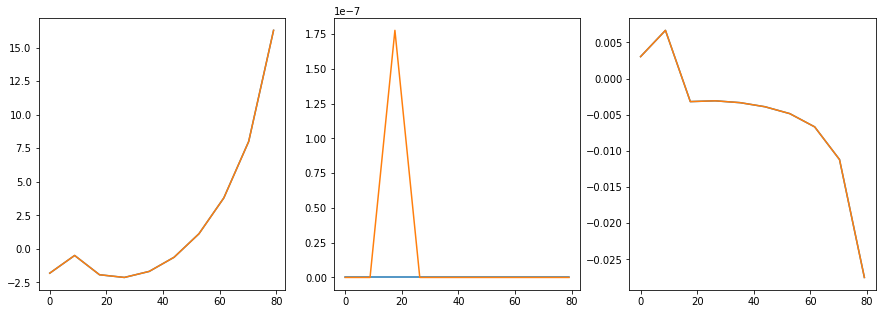

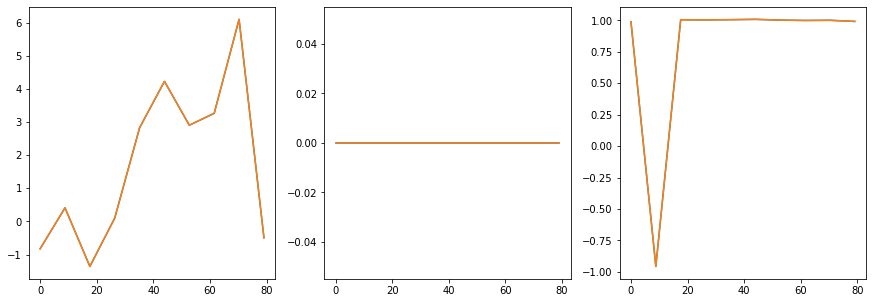

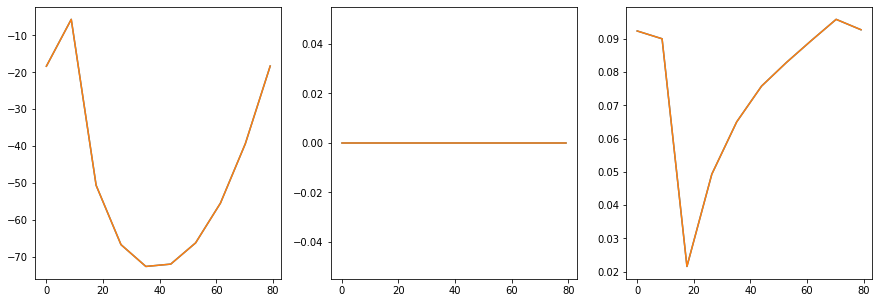

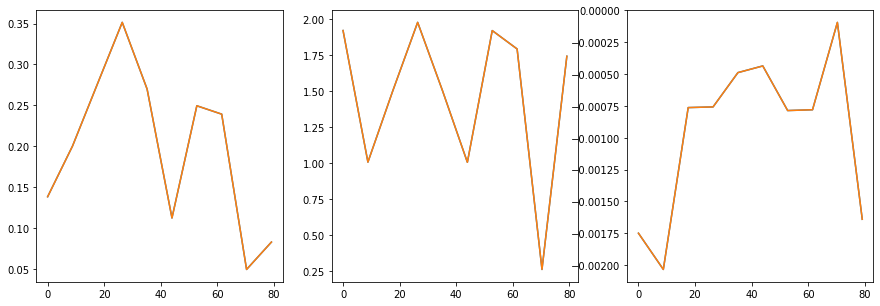

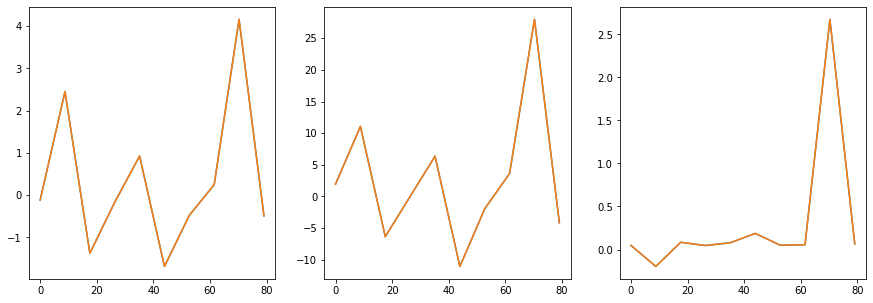

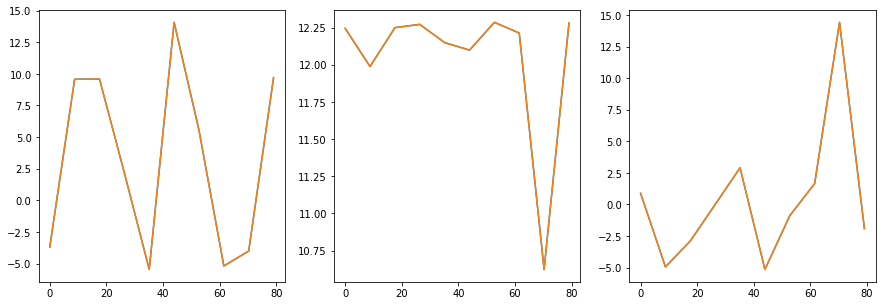

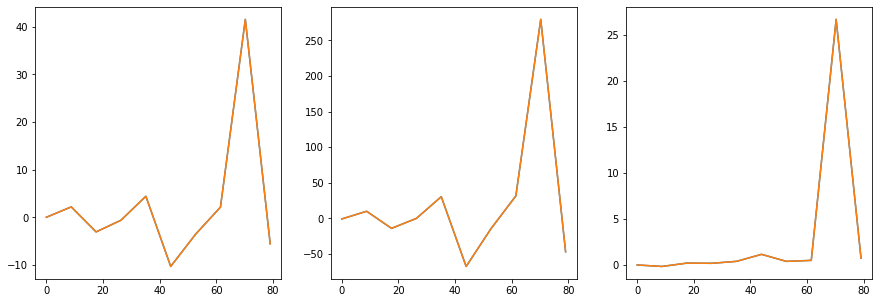

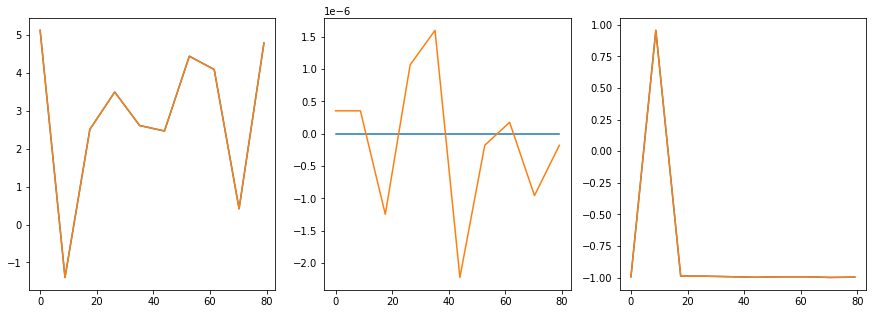

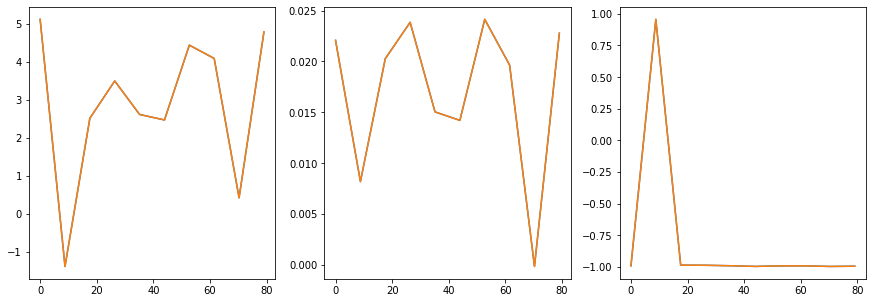

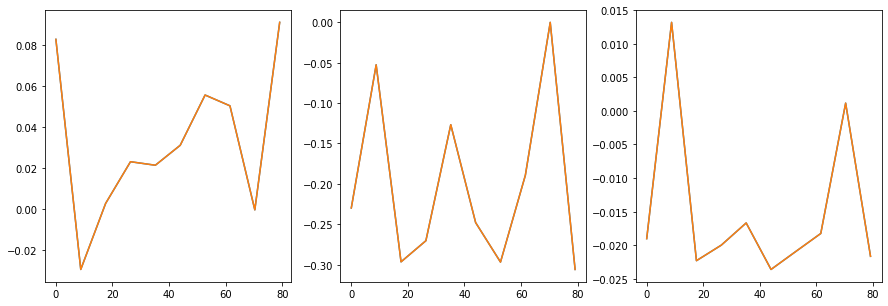

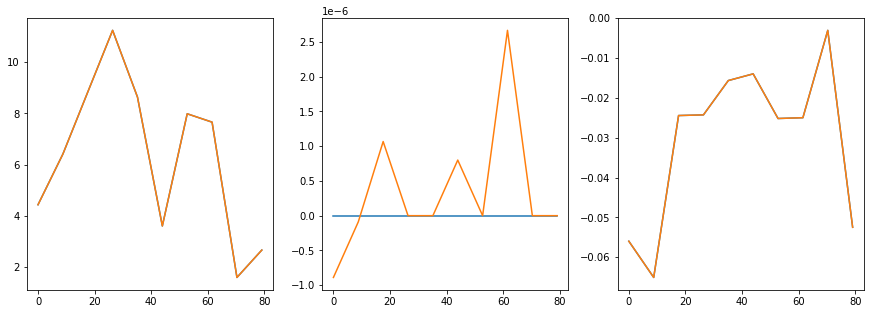

In [20]:
for i in range(len(d)):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].plot(t, dbp[i])
    axs[0].plot(t, dbp_fd[i])
    axs[1].plot(t, dbpm[i])
    axs[1].plot(t, dbpm_fd[i])
    axs[2].plot(t, dtheta[i])
    axs[2].plot(t, dtheta_fd[i])

In [162]:
flux = gf.phot.flux
flux_ng = gf.phot.flux_ng

coords = [
        [0.95, 1, 1.15, 0.75],
        [0.95, 1, 0.7, 0.75],
        [0.8, 0.8, 1.15, 0.75],
        [0.4, 0.4, 0.4, 0.4],
        [0.4, 0.4, 0.6, 0.2],
        [0.4, 0.4, 0.65, 0.65],
        [0.55, 0.55, 0.52, 0.52],
        [0.6, 0.6, 0.4, 0.4],
        [0.65, 0.65, 0.65, 0.65],
        [0.6, 0.6, 0.75, 0.75],
        [0.8, 0.8, 0.65, 0.65],
        [0.52, 0.52, 0.7, 0.7],
        [0.88, 0.88, 0.7, 0.7],
        [0.85, 0.9, 1.05, 0.5],
        [0.5, 0.55, 0.8, 0.3],
        [0.6, 0.65, 0.9, 0.4]
    ]

u1, u2, rp, rm = 0.5, 0.3, 0.1, 0.05
params = [u1, u2, rp, rm]
dx = 1e-8
    
for xp, yp, xm, ym in coords:
    bp, bpm, theta = tu.change_coords(xp, yp, xm, ym)    
    
    lc = flux(
            params[0], params[1], params[2], params[3], 
            np.array([bp]), 
            np.array([bpm]), 
            np.array([np.cos(theta)]), 
            np.array([np.sin(theta)])
    )[0]
    exact = [lc[6], lc[7], lc[1], lc[2]]
    
    fd = np.zeros_like(params)
    for i in range(len(params)):
            
        params[i] += dx
            
        flux_plus = flux_ng(
                params[0], params[1], params[2], params[3], 
                np.array([bp]), 
                np.array([bpm]), 
                np.array([np.cos(theta)]), 
                np.array([np.sin(theta)])
        )[0]
            
        params[i] -= 2 * dx
        flux_minus = flux_ng(
                params[0], params[1], params[2], params[3], 
                np.array([bp]), 
                np.array([bpm]), 
                np.array([np.cos(theta)]), 
                np.array([np.sin(theta)])
        )[0]
        
        fd[i] = (flux_plus - flux_minus) / (2 * dx)
    
    assert np.allclose(fd, exact, rtol=1e-5)

In [134]:
lc

array([[-0.00898221, -0.15573138, -0.03541714,  0.04225586,  0.00917261,
         0.00726939,  0.00490923,  0.00343427]])